# Baseline Model

I will use the test set to measure accuracy of these baseline models; however, note that hyperparameter tuning and model selection with more complex models will use validation sets or cross-validation to prevent adding bias to our final model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('../')
import src.data_loader as dl

## Majority Class Classifier

Our minimal lower bound will be modeled by a majority class classifier. Because scratch is the most common class, we will always predict an image is a scratch.

In [58]:
true_labels = pd.read_csv('../data/processed/test/labels.csv')['label'].values
pred_labels = np.array([2]*len(true_labels))

f1_weighted = f1_score(true_labels, pred_labels, average='weighted')
print(f'F1: {f1_weighted:.3f}')
accuracy = accuracy_score(true_labels, pred_labels)
print(f'Accuracy: {accuracy:.3f}')

F1: 0.161
Accuracy: 0.326


## Logistic Regression

In [4]:
X_train_flat = dl.load_flat_imgs('../data/processed/train/images/')
X_test_flat = dl.load_flat_imgs('../data/processed/test/images/')
y_train = pd.read_csv('../data/processed/train/labels.csv')['label'].values
y_test = pd.read_csv('../data/processed/test/labels.csv')['label'].values
print(X_train_flat.shape)
print(X_test_flat.shape)
print(y_train.shape)
print(y_test.shape)

(5623, 52800)
(1406, 52800)
(5623,)
(1406,)


In [8]:
clf = LogisticRegression(max_iter=100, n_jobs=-1, C=0.1)
clf.fit(X_train_flat, y_train)
y_pred = clf.predict(X_test_flat)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1: {f1_weighted:.3f}')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# OUTPUT
# Weighted F1: 0.251
# Accuracy: 0.251

/Users/landon/anaconda3/envs/proj492/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Weighted F1: 0.258
Accuracy: 0.269


In [5]:
clf = LogisticRegression(max_iter=1000, n_jobs=-1)
clf.fit(X_train_flat, y_train)
y_pred = clf.predict(X_test_flat)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1: {f1_weighted:.3f}')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# OUTPUT
# Weighted F1: 0.251
# Accuracy: 0.251

/Users/landon/anaconda3/envs/proj492/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Weighted F1: 0.251
Accuracy: 0.251


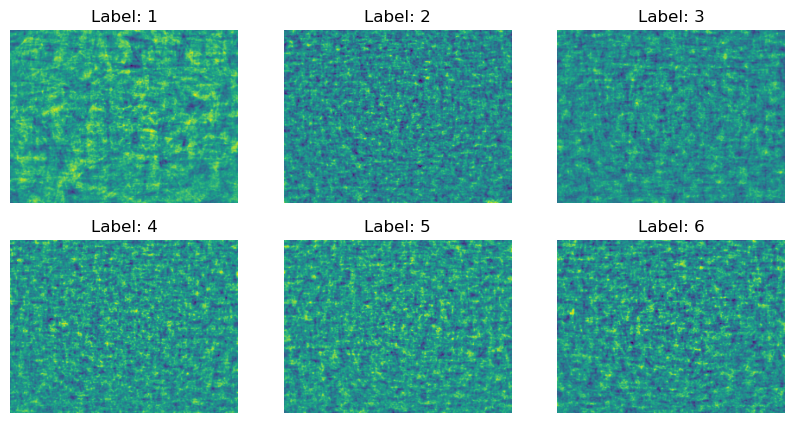

In [22]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(clf.coef_[i].reshape(200, 264))
    plt.axis('off')
    plt.title(f'Label: {clf.classes_[i]}')
plt.show()

## MLP

In [9]:
# use flat data to train sklearn mlp
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(250, 80, 20), max_iter=1000)
mlp.fit(X_train_flat, y_train)

/Users/landon/anaconda3/envs/proj492/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(250, 80, 20), max_iter=1000)

In [ ]:
y_pred = clf.predict(X_test_flat)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1: {f1_weighted:.3f}')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

## Shallow CNN

In [ ]:


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
